In [8]:
from frameGenerator import process

process("dragon_ball_z_-_001.mp4")


Processing video: dragon_ball_z_-_001.mp4
Detecting scenes...


  Detected: 0 | Progress:   0%|          | 0/29843 [00:00<?, ?frames/s]INFO:pyscenedetect:Detecting scenes...
  Detected: 360 | Progress: 100%|██████████| 29843/29843 [00:08<00:00, 3390.95frames/s]


Found 361 scenes


Extracting Frames: 100%|██████████| 361/361


Completed processing. Extracted 361 scenes.


{'fps': 23,
 'total_scenes': 361,
 'scene_frame_paths': ['unlabeled_data/scene_0.jpg',
  'unlabeled_data/scene_1.jpg',
  'unlabeled_data/scene_2.jpg',
  'unlabeled_data/scene_3.jpg',
  'unlabeled_data/scene_4.jpg',
  'unlabeled_data/scene_5.jpg',
  'unlabeled_data/scene_6.jpg',
  'unlabeled_data/scene_7.jpg',
  'unlabeled_data/scene_8.jpg',
  'unlabeled_data/scene_9.jpg',
  'unlabeled_data/scene_10.jpg',
  'unlabeled_data/scene_11.jpg',
  'unlabeled_data/scene_12.jpg',
  'unlabeled_data/scene_13.jpg',
  'unlabeled_data/scene_14.jpg',
  'unlabeled_data/scene_15.jpg',
  'unlabeled_data/scene_16.jpg',
  'unlabeled_data/scene_17.jpg',
  'unlabeled_data/scene_18.jpg',
  'unlabeled_data/scene_19.jpg',
  'unlabeled_data/scene_20.jpg',
  'unlabeled_data/scene_21.jpg',
  'unlabeled_data/scene_22.jpg',
  'unlabeled_data/scene_23.jpg',
  'unlabeled_data/scene_24.jpg',
  'unlabeled_data/scene_25.jpg',
  'unlabeled_data/scene_26.jpg',
  'unlabeled_data/scene_27.jpg',
  'unlabeled_data/scene_28.jpg'

In [9]:
from briaai import remove_background

remove_background("unlabeled_data")

You are using a model of type birefnet to instantiate a model of type SegformerForSemanticSegmentation. This is not supported for all configurations of models and can yield errors.


Found 507 images to process


Removing Background: 100%|██████████| 507/507


In [10]:
from maskrcnn import process_directory

process_directory("unlabeled_data")

Loading model: COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml
Using device: cuda


INFO:detectron2.checkpoint.detection_checkpoint:[DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...
INFO:iopath.common.file_io:URL https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl cached in /home/jebineinstein/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl
INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /home/jebineinstein/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...
INFO:fvcore.common.checkpoint:Reading a file from 'Detectron2 Model Zoo'


Found 507 images to process


Extracting Humans:   0%|          | 0/507/home/jebineinstein/git/venv/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Extracting Humans: 100%|██████████| 507/507


{'unlabeled_data/scene_301.jpg': [],
 'unlabeled_data/scene_142.jpg': [],
 'unlabeled_data/scene_264.jpg': [],
 'unlabeled_data/scene_323.jpg': ['unlabeled_data/scene_323_0.png',
  'unlabeled_data/scene_323_1.png'],
 'unlabeled_data/scene_304.jpg': [],
 'unlabeled_data/scene_308.jpg': [],
 'unlabeled_data/scene_295.jpg': [],
 'unlabeled_data/scene_86.jpg': [],
 'unlabeled_data/scene_306.jpg': ['unlabeled_data/scene_306_0.png',
  'unlabeled_data/scene_306_1.png'],
 'unlabeled_data/scene_121.jpg': [],
 'unlabeled_data/scene_57.jpg': ['unlabeled_data/scene_57_0.png'],
 'unlabeled_data/scene_285.jpg': [],
 'unlabeled_data/scene_244.jpg': [],
 'unlabeled_data/scene_350.jpg': [],
 'unlabeled_data/scene_310.jpg': [],
 'unlabeled_data/scene_11.jpg': [],
 'unlabeled_data/scene_189.jpg': [],
 'unlabeled_data/scene_169.jpg': [],
 'unlabeled_data/scene_183.jpg': ['unlabeled_data/scene_183_0.png'],
 'unlabeled_data/scene_303.jpg': ['unlabeled_data/scene_303_0.png'],
 'unlabeled_data/scene_271.jpg':

In [11]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import os

In [12]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNN
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ResNet
])

In [13]:
# Load pre-trained ResNet18 for feature extraction
model = models.resnet101(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model.eval()  # Set model to evaluation mode

/home/jebineinstein/git/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jebineinstein/git/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [14]:
# Function to extract features
def extract_features(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        feature = model(image)
    return feature.squeeze().numpy().flatten()  # Flatten the feature vector

In [15]:
# Set your image folder path
image_folder = "unlabeled_data"

In [1]:
# Load all images and extract features
image_files = [f for f in os.listdir(image_folder) if f.endswith(('png', 'jpg', 'jpeg'))]

features = []
image_paths = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    feature_vector = extract_features(image_path)
    features.append(feature_vector)
    image_paths.append(image_path)

features = np.array(features)  # Convert list to NumPy array

NameError: name 'os' is not defined

In [27]:
from sklearn.cluster import KMeans

# Set number of clusters (choose based on your dataset)
# N_CLUSTERS = 5  

# Apply K-Means clustering
# kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
kmeans = KMeans(random_state=42, n_init=20)
labels = kmeans.fit_predict(features)

N_CLUSTERS = np.unique(labels).size

labels


array([1, 3, 1, 5, 3, 1, 2, 6, 5, 3, 4, 1, 3, 0, 4, 1, 7, 0, 4, 1, 3, 2,
       5, 2, 7, 6, 1, 5, 3, 3, 3, 3, 4, 4, 4, 3, 1, 3, 5, 4, 4, 6, 1, 4,
       1, 6, 4, 5, 6, 6, 1, 4, 7, 7, 3, 4, 6, 5, 7, 4, 7, 6, 6, 5, 4, 3,
       3, 6, 0, 1, 1, 1, 3, 1, 5, 6, 4, 7, 4, 0, 5, 7, 2, 6, 4, 0, 7, 4,
       6, 5, 5, 6, 5, 6, 4, 6, 0, 7, 6, 4, 2, 1, 1, 5, 4, 7, 3, 5, 5, 4,
       1, 5, 2, 5, 6, 5, 0, 3, 5, 6, 7, 0, 5, 6, 7, 6, 2, 3, 1, 2, 6, 2,
       1, 6, 6, 0, 4, 4, 5, 1, 2, 3, 2, 1, 6, 1, 3, 7, 4, 1, 1, 6, 6, 1,
       7, 4, 7, 5, 7, 5, 4, 4, 5, 6, 7, 1, 4, 4, 6, 4, 3, 3, 6, 7, 5, 6,
       5, 4, 2, 6, 1, 1, 5, 5, 7, 1, 6, 6, 0, 5, 6, 6, 4, 4, 5, 3, 5, 0,
       1, 3, 4, 2, 1, 1, 3, 3, 4, 6, 7, 1, 3, 4, 4, 6, 6, 5, 0, 6, 4, 3,
       0, 7, 1, 4, 5, 7, 1, 6, 3, 5, 2, 2, 1, 1, 7, 5, 2, 5, 4, 0, 5, 4,
       1, 6, 2, 4, 7, 1, 6, 4, 7, 1, 3, 0, 7, 0, 5, 7, 3, 6, 5, 3, 5, 6,
       1, 5, 2, 3, 7, 6, 7, 5, 1, 4, 1, 2, 1, 5, 5, 7, 6, 6, 0, 1, 5, 6,
       2, 4, 5, 6, 6, 5, 7, 4, 7, 2, 5, 7, 3, 7, 2,

In [28]:
import numpy as np

# Compute cluster centers
cluster_centers = kmeans.cluster_centers_

# Compute distances of each image from its assigned cluster center
distances = np.linalg.norm(features - cluster_centers[labels], axis=1)

# Identify outliers (e.g., top 5% farthest points)
threshold = np.percentile(distances, 95)  # Top 5% as outliers
outlier_indices = np.where(distances > threshold)[0]

print(f"Detected {len(outlier_indices)} outliers out of {len(features)} images.")


Detected 33 outliers out of 645 images.


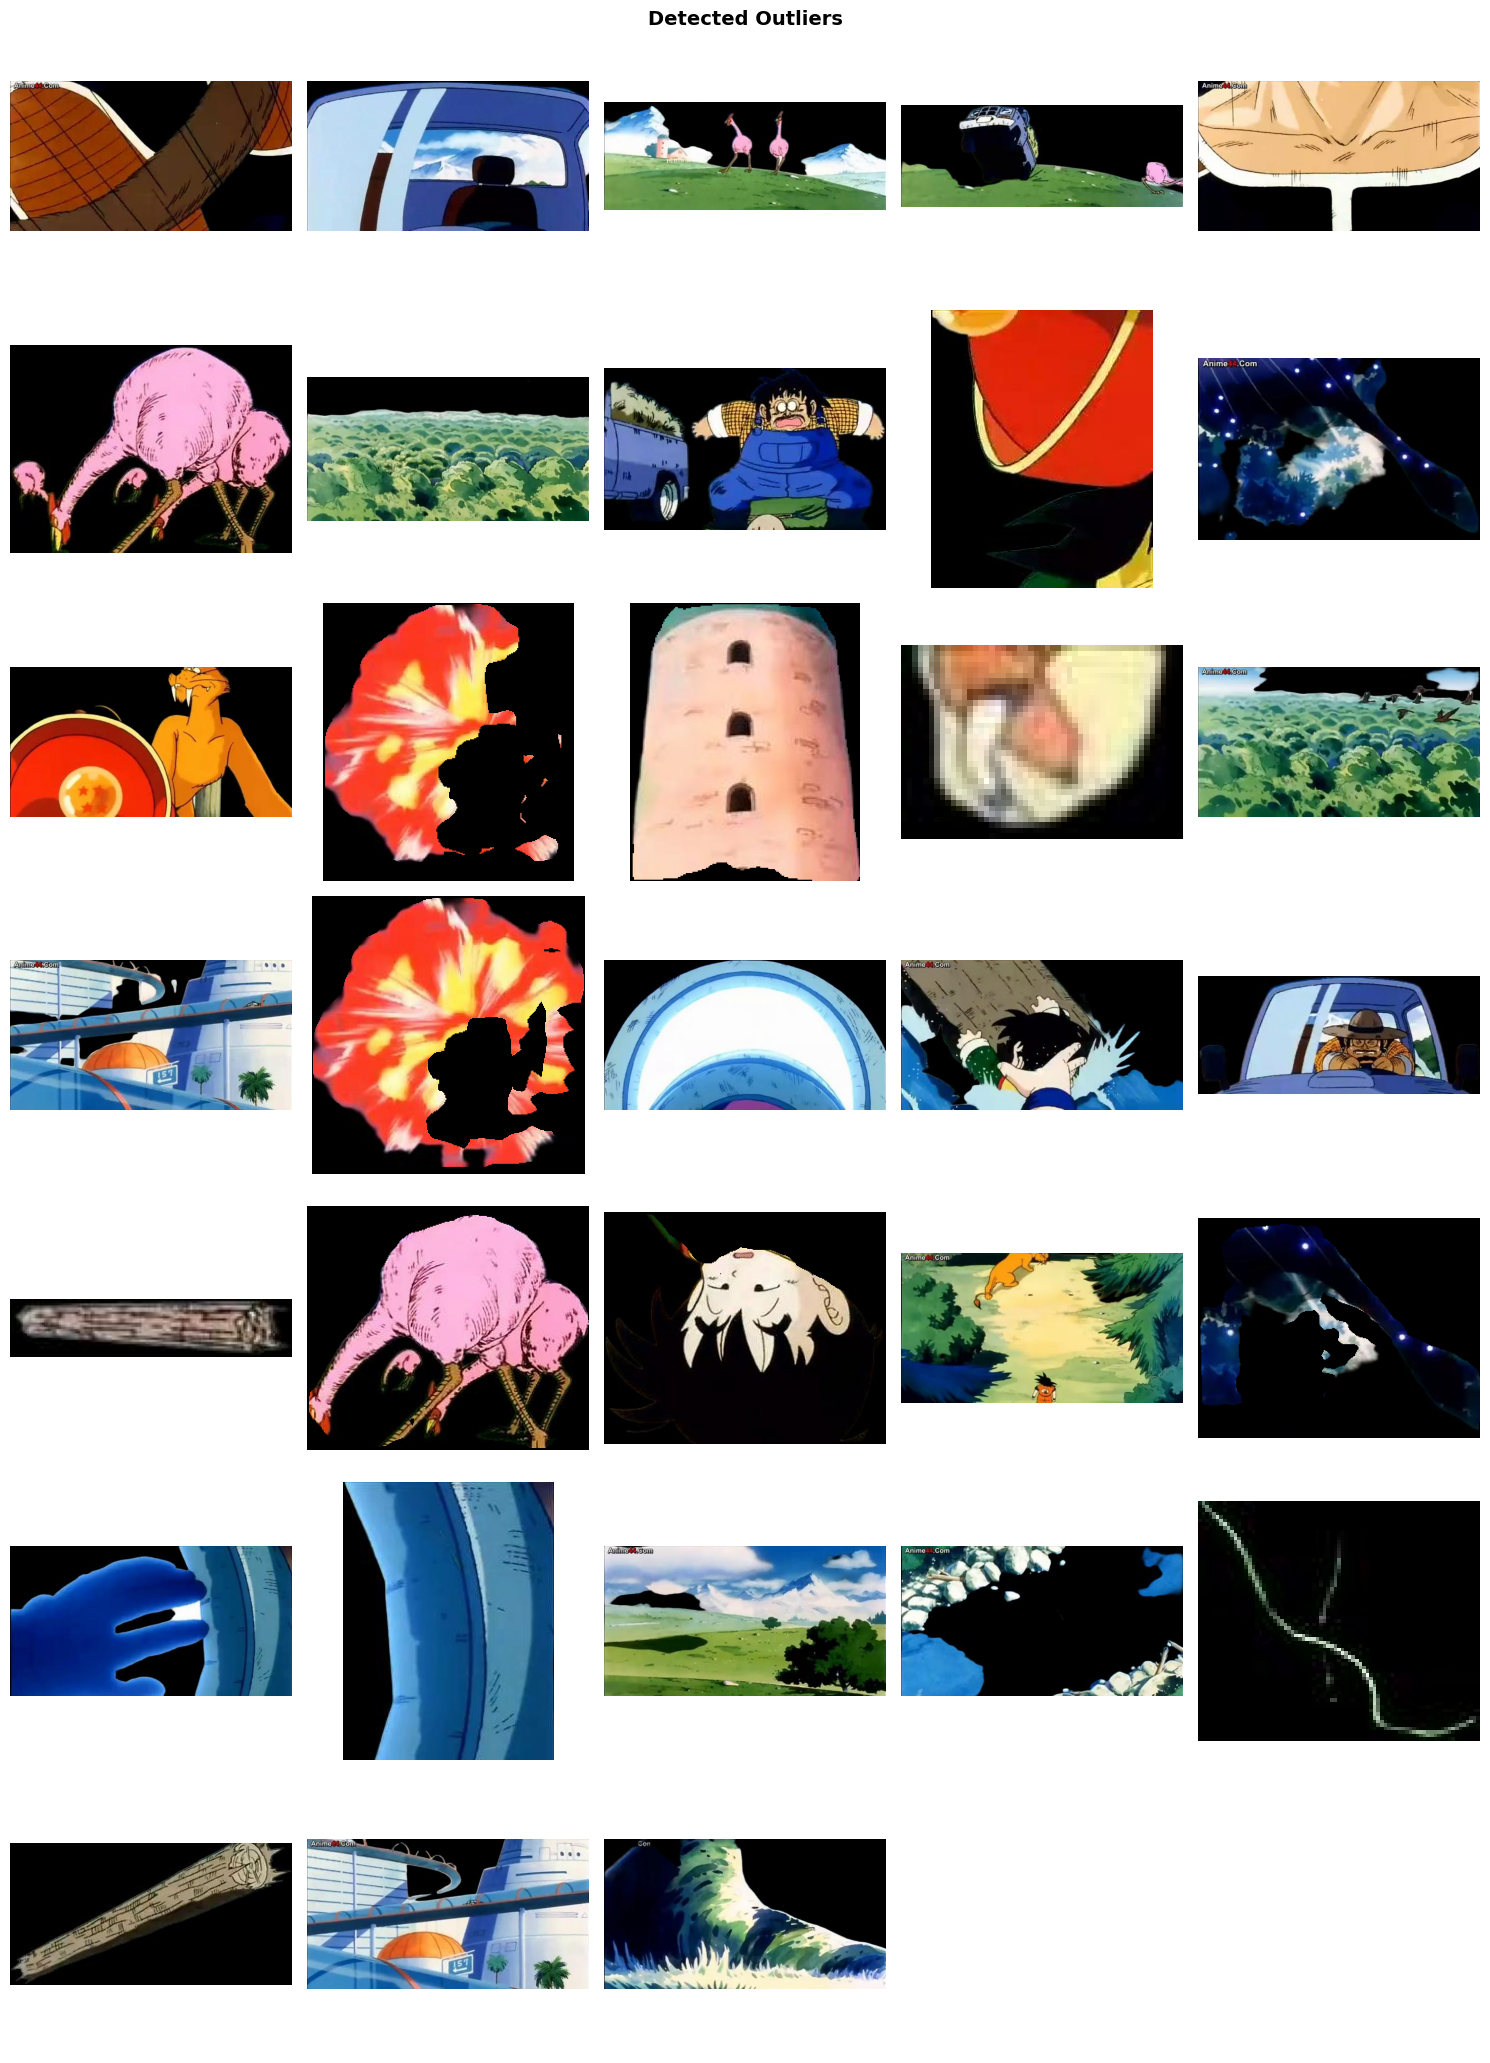

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# Select outlier images
outlier_images = [image_paths[i] for i in outlier_indices]

# Display outlier images
def show_outliers(outlier_images, max_cols=5):
    num_outliers = len(outlier_images)
    num_cols = min(num_outliers, max_cols)
    num_rows = (num_outliers + num_cols - 1) // num_cols  # Compute needed rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
    axes = axes.flatten()

    for i, img_path in enumerate(outlier_images):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")

    # Hide any empty subplot slots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Detected Outliers", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

show_outliers(outlier_images)


In [30]:
import shutil

label_map = {
    0: "gohan",
    1: "goku",
    2: "picolo",
    3: "chichi",
    4: "raditz",
    5: "civilian",
    6: "civilian",
    7: "civilian",
}

# Create output directories
output_base = "labeled_data"
if os.path.exists(output_base):
    shutil.rmtree(output_base)

os.makedirs(output_base, exist_ok=True)

for cluster_id in range(N_CLUSTERS):
    os.makedirs(os.path.join(output_base, f"{label_map[cluster_id]}"), exist_ok=True)

# Move images to respective cluster folders
for i, image_path in enumerate(image_paths):
    cluster_id = labels[i]
    new_path = os.path.join(output_base, f"{label_map[cluster_id]}", os.path.basename(image_path))
    shutil.copyfile(image_path, new_path)

print(f"Images have been clustered into {N_CLUSTERS} groups and moved to '{output_base}'")


Images have been clustered into 8 groups and moved to 'labeled_data'


In [32]:
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the number of clusters
N_CLUSTERS = 5  # Adjust based on your actual clusters

def move_image(image_path, destination_folder):
    """Move an image to the selected cluster folder."""
    destination_folder = f'labeled_data/{destination_folder}'
    os.makedirs(destination_folder, exist_ok=True)
    new_path = os.path.join(destination_folder, os.path.basename(image_path))
    shutil.move(image_path, new_path)
    print(f"Moved: {image_path} → {new_path}")

def delete_image(image_path):
    """Delete an image."""
    os.remove(image_path)
    print(f"Deleted: {image_path}")

def create_image_display(img_path):
    """Helper function to display an image with buttons below it."""
    img = Image.open(img_path)
    img.thumbnail((150, 150))  # Resize for uniform display
    
    # Display Image
    image_widget = widgets.Output()
    with image_widget:
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    
    # Dropdown to select move destination
    move_dropdown = widgets.Dropdown(
        options=[(f"{label_map[i]}", f"{label_map[i]}") for i in range(N_CLUSTERS)],
        description="Move to:",
        layout=widgets.Layout(width='150px')
    )
    
    move_button = widgets.Button(description="Move", layout=widgets.Layout(width='60px'))
    delete_button = widgets.Button(description="Delete", layout=widgets.Layout(width='60px'))
    
    # Define button actions
    move_button.on_click(lambda btn: move_image(img_path, move_dropdown.value))
    delete_button.on_click(lambda btn: delete_image(img_path))
    
    # Layout buttons and dropdown
    button_box = widgets.HBox([move_dropdown, move_button, delete_button])
    return widgets.VBox([image_widget, button_box])

def visualize_clusters(image_paths, labels, max_columns=5):
    """Visualize clustered images with interactive move/delete buttons."""
    clusters = {}
    # Loop through each item in output_base
    for dir_name in os.listdir(output_base):
        dir_path = os.path.join(output_base, dir_name)  # Get full path
        
        # Check if it's a directory before listing files inside
        if os.path.isdir(dir_path):
            # Loop through each file in the directory
            for file_name in os.listdir(dir_path):
                file_path = os.path.join(dir_path, file_name)
                clusters.setdefault(dir_name, []).append(file_path)
    
    for label, img_list in clusters.items():
        print(f"{label}:")
        display(widgets.Label(value=f"{label}", style={'font_weight': 'bold'}))
        
        image_widgets = [create_image_display(img) for img in img_list]
        # Create a horizontal scrollable container
        scrollable_row = widgets.Box(
            children=image_widgets,
            layout=widgets.Layout(
                display="flex",
                flex_direction="row",
                overflow_x="auto",  # Enables horizontal scrolling
                width="100%",       
                height="600px",     # Adjust for visibility
                flex_wrap="nowrap"  # Prevents wrapping to new lines
            )
        )
        
        # Ensure images do not shrink too much
        for img_widget in image_widgets:
            img_widget.layout = widgets.Layout(min_width="300px", margin="5px")  # Adjust min_width for proper spacing
        
        display(scrollable_row)

# Example usage
visualize_clusters(output_base, labels)

chichi:


Label(value='chichi', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…

gohan:


Label(value='gohan', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…

raditz:


Label(value='raditz', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…

goku:


Label(value='goku', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…

picolo:


Label(value='picolo', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…

civilian:


Label(value='civilian', style=LabelStyle(font_weight='bold'))

Box(children=(VBox(children=(Output(), HBox(children=(Dropdown(description='Move to:', layout=Layout(width='15…